In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [8]:
class AutoEDA:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def read_data(self):
        while True:
            data_type = input("Enter the data type (csv, excel): ").lower()
            
            if data_type not in ['csv', 'excel']:
                print("Unsupported data type. Supported types: 'csv', 'excel'")
                continue
            
            data_path = input("Enter the path to the data file: ")
            
            try:
                if data_type == 'csv':
                    data = pd.read_csv(data_path)
                elif data_type == 'excel':
                    data = pd.read_excel(data_path)
            except FileNotFoundError:
                print("File not found. Please check the file path.")
                continue
            
            print("Your data has been loaded")
            return data

    def handle_missing_values(self, inplace=True):
        try:
            method = input("Enter the method to handle missing values ('mean', 'median', 'drop'): ").lower()

            if method not in ['mean', 'median', 'drop']:
                raise ValueError('Please enter method as "mean", "median", or "drop"')
                
            df = self.dataframe if inplace else self.dataframe.copy()

            if method == 'mean':
                df.fillna(df.mean(), inplace=True)
            elif method == 'median':
                df.fillna(df.median(), inplace=True)
            elif method == 'drop':
                df.dropna(inplace=True)
            
            print("Missing values handled successfully.")
        except Exception as e:
            print(f"An error occurred: {e}")
            df = None
        
        return df
    
    def handle_categorical_data(self, inplace=True):
        try:
            columns = self.dataframe.select_dtypes(include=['object'])

            method = input("Enter the method to handle categorical values ('OHE', 'LE'): ").lower()

            if method not in ['ohe', 'le']:
                raise ValueError('Please enter method as "OHE" or "LE"')

            df = self.dataframe if inplace else self.dataframe.copy()

            if method == 'ohe':
                for col in columns :
                    df = pd.get_dummies(df, columns=[col], drop_first=True)
                    
            elif method == 'le':
                encoder = LabelEncoder()
                for col in columns:
                    df[col] = encoder.fit_transform(df[col])

            print("Categorical data handled successfully.")
        except Exception as e:
            print(f"An error occurred: {e}")
            df = None

        return df
    
    def scaling_data(self,inplace=True):
    
        try : 
            method = input("Enter the method to scale your data ('min_max','standard'): ").lower()

            if method not in ['min_max', 'standard']:
                raise ValueError('Please enter method as "min_max" or "standard"')

            df = self.dataframe if inplace else self.dataframe.copy()
            

            if method == 'min_max' :
                from sklearn.preprocessing import MinMaxScaler
                scaler = MinMaxScaler()
                df = scaler.fit_transform(handled_data)
                df = pd.DataFrame(df, columns = handled_data.columns)


            elif method == 'standard' :
                from sklearn.preprocessing import StandardScaler
                scaler = StandardScaler()
                df = scaler.fit_transform(handled_data)
                df = pd.DataFrame(df, columns = handled_data.columns)


        except Exception as e:
            print(f"An error occurred: {e}")
            df = None


        return df
    
    def create_boxplot(self) :
        
        df = self.dataframe
        
        column = input("Enter the column to show boxplot visualization  ")
        
  
        
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column], vert=True)
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Values")
        plt.show()
        
        
    def create_barchart(self):

        df = self.dataframe

        x_column = input("Enter the first column ")
        y_column = input("Enter the second column ")
        


        plt.figure(figsize=(8, 6))
        plt.bar(df[x_column], df[y_column])
        plt.title(f"Bar Chart of {y_column} vs. {x_column}")
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
    
    def create_scatter(self):
        
        df = self.dataframe

        x_column = input("Enter the first column ")
        y_column = input("Enter the second column ")
        
        plt.figure(figsize=(8, 6))
        plt.scatter(df[x_column], df[y_column], c='blue', alpha=0.5, s=30)
        plt.title(f"Scatter Plot of {y_column} vs. {x_column}")
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.grid(True)
        plt.show()
        
        
    def create_heatmap(self):
        df = self.dataframe
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title("Correlation Heatmap")
        plt.show()

In [9]:
eda_tool = AutoEDA(dataframe=None)
loaded_data = eda_tool.read_data()
print("Loaded Data:")
loaded_data.head()

Enter the data type (csv, excel): csv
Enter the path to the data file: C:\Users\user\Documents\GitHub\Electro-Pi\Auto EDA\International_Report_Passengers.csv
Your data has been loaded
Loaded Data:


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [10]:
print('Description of data is:')
loaded_data.describe()

Description of data is:


,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


In [11]:
print('Missing values in data are:')
loaded_data.isna().sum()

Missing values in data are:


data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [12]:
auto_eda = AutoEDA(loaded_data)
handled_data = auto_eda.handle_missing_values()
handled_data.isna().sum()

Enter the method to handle missing values ('mean', 'median', 'drop'): drop
Missing values handled successfully.


data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [13]:
auto_eda = AutoEDA(handled_data)
handled_data = auto_eda.handle_categorical_data()
handled_data.head()

Enter the method to handle categorical values ('OHE', 'LE'): le
Categorical data handled successfully.


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,147,2014,5,14492,652,36,11032,259,148,19534,125,0,0,0,315,315
1,170,2007,6,13204,453,33,16085,1164,951,20364,160,0,0,0,683,683
2,348,2005,12,11433,187,43,10411,56,277,20344,436,1,0,0,1010,1010
3,106,2003,4,13487,500,63,16304,1287,148,20204,349,1,0,0,508,508
4,348,2005,12,12016,293,5,11138,242,766,20312,511,1,0,0,76,76


In [14]:
auto_eda = AutoEDA(handled_data)
handled_data = auto_eda.scaling_data()
handled_data.head()


Enter the method to scale your data ('min_max','standard'): standard


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,-0.310888,0.898772,-0.394140,0.682838,1.311775,-0.303480,-1.258269,-1.109211,-1.094926,-0.971225,-1.049933,-1.129131,0.0,-0.752303,0.124568,-0.746339
1,-0.091740,0.095614,-0.105699,0.170431,0.314147,-0.410318,1.324087,1.241363,1.645232,0.653907,-0.839658,-1.129131,0.0,-0.752303,0.510359,-0.703267
2,1.604275,-0.133859,1.624946,-0.534128,-1.019365,-0.054190,-1.575633,-1.636466,-0.654726,0.614747,0.818514,0.885637,0.0,-0.752303,0.853168,-0.664993
3,-0.701543,-0.363333,-0.682581,0.283017,0.549768,0.658068,1.436007,1.560833,-1.094926,0.340628,0.295830,0.885637,0.0,-0.752303,0.326899,-0.723750
4,1.604275,-0.133859,1.624946,-0.302192,-0.487966,-1.407479,-1.204097,-1.153365,1.013938,0.552091,1.269104,0.885637,0.0,-0.752303,-0.125986,-0.774313


Enter the column to show boxplot visualization  Total


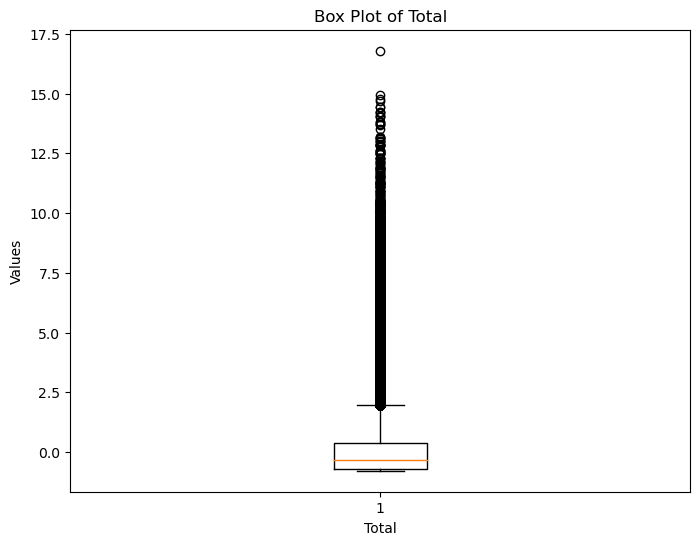

In [15]:
auto_eda = AutoEDA(handled_data)
auto_eda.create_boxplot()

Enter the first column Month
Enter the second column Total


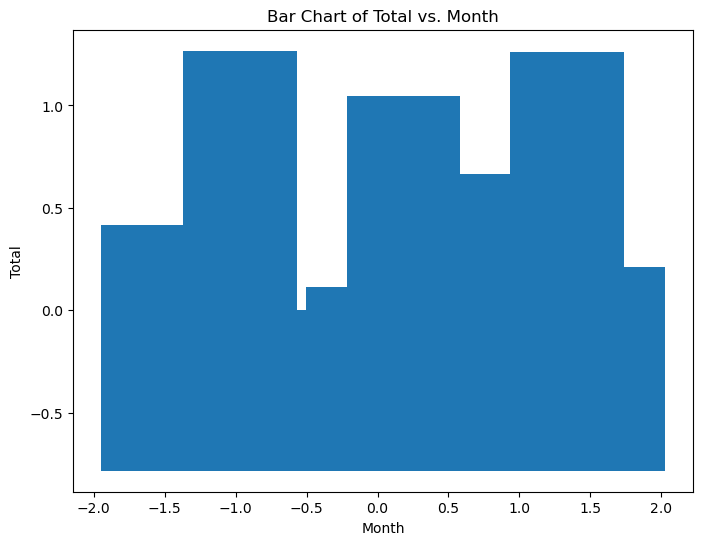

In [17]:
auto_eda = AutoEDA(handled_data[0:1000])
auto_eda.create_barchart()


Enter the first column Month
Enter the second column Total


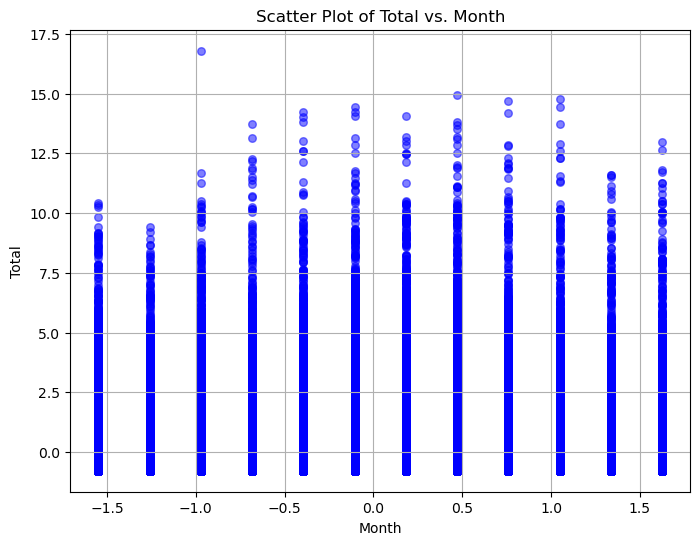

In [20]:
auto_eda = AutoEDA(handled_data)
auto_eda.create_scatter()

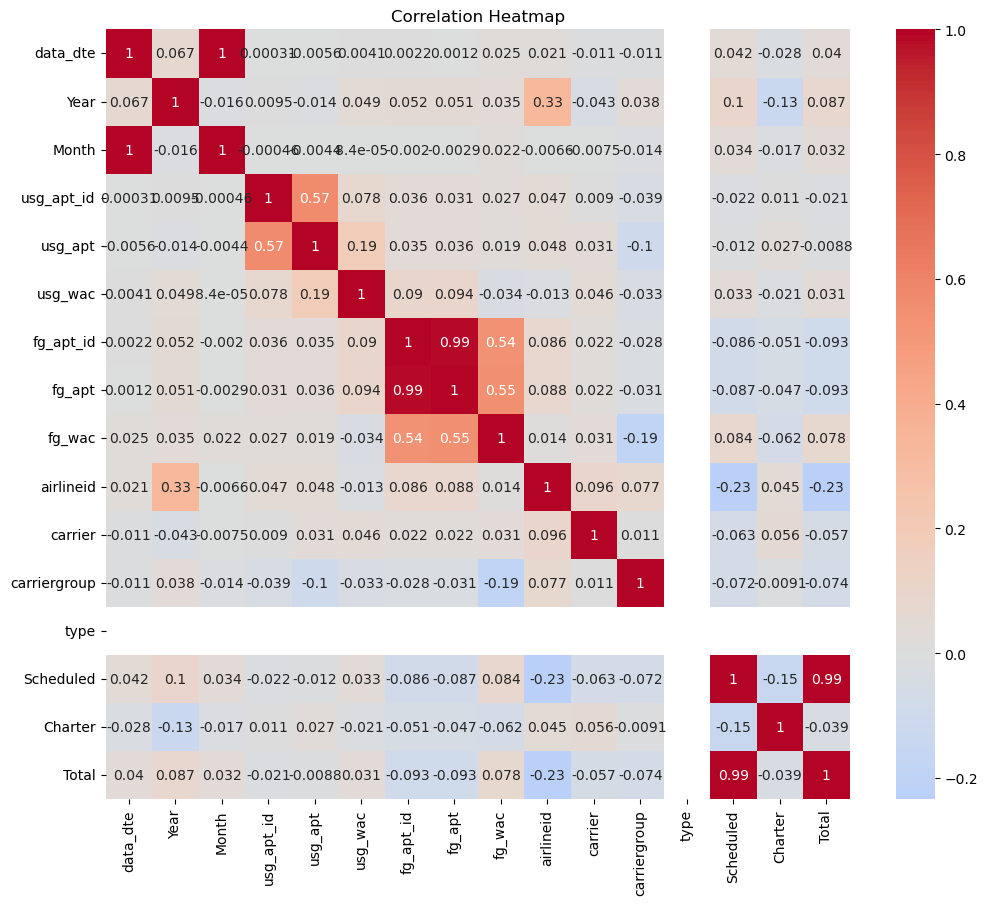

In [21]:
auto_eda = AutoEDA(handled_data)
auto_eda.create_heatmap()